# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

# 📝 PROBLEM CONTEXT

**New Product Sales Methods**

Six weeks ago we launched a new line of office stationery. Despite the world becoming
increasingly digital, there is still demand for notebooks, pens and sticky notes.


Our focus has been on selling products to enable our customers to be more creative, focused
on tools for brainstorming. We have tested three different sales strategies for this, targeted
email and phone calls, as well as combining the two.


Email: Customers in this group received an email when the product line was launched, and a
further email three weeks later. This required very little work for the team.


Call: Customers in this group were called by a member of the sales team. On average
members of the team were on the phone for around thirty minutes per customer.


Email and call: Customers in this group were first sent the product information email, then
called a week later by the sales team to talk about their needs and how this new product
may support their work. The email required little work from the team, the call was around ten
minutes per customer.

**Sales team Need:**

We need to know:

- How many customers were there for each approach?
- What does the spread of the revenue look like overall? And for each method?
- Was there any difference in revenue over time for each of the methods?
- Based on the data, which method would you recommend we continue to use? 

Some of these methods take more time from the team so they may not be the best for us
to use if the results are similar.

We don’t really know if there are other differences between the customers in each group, so
anything you can tell us would be really helpful to give some context to what went well.

# 📝 DATA VALIDATION

The data set originally has **15000 data points**, at the end 1074 missing values were drop and we end up with **13926 data points**, these missing values were **drop** because they were in the revenue column which in my concept is one of the more important columns and because it’s not appropriate to replace these values with a metric such as the mean.

In the third column of the next table its reported if the data was cleaned to be valid according with the given details.


| Column Name                       | Details                                                                | Validation of Data Set and Cleaning Steps if Necessary                                        |
|----------------------------------|------------------------------------------------------------------------|------------------------------------------------------------------------------------------------|
| week                             | Week sale was made, counted as weeks since product launch              | No cleaning of data was necessary, the original data was valid. 15000 data points no-null, int64.                                  |
| sales_method                     | Character, which of the three sales methods were used for that customer                                    | 15000 data points no-null, object. I replace 23 values "em + call" for "Email + Call" and 10 "email" values for "Email"
| customer_id                      | Character, unique identifier for the customer                          | No cleaning of data was necessary, the original data was valid. 15000 data points no-null, object.                                   |
| nb_sold                          | Numeric, number of new products sold                                    | No cleaning of data was necessary, the original data was valid. 15000 data points no-null, int64.                                   |
| revenue                          | Numeric, revenue from the sales, rounded to 2 decimal places.           | 13926 data points no-null, float64, 1074 missing values. **I will drop the null values. I will not replace the missing values** because I just want to analyze the original revenue data, I don’t want to replace with the mean or other metric, also its less than 10% of the data that is not available, I will work with the 13926 data points available, which is more than enough to understand and propose solutions to the problem. Also, the missing values are spread on all "sales_methods", so that there are 181 missing values for the "Call" method, 544 for "Email" and 349 for "Email+Call" so not a single method is affected disproportionately by missing values.                                    |
| years_as_customer                | Numeric, number of years customer has been buying from us               | 15000 data points no-null, int64. There are 2 non valid data points of customers that have been clients before 1984, I replace this values for the mean.                                   |
| nb_site_visits                   | Numeric, number of times the customer has visited our website           | No cleaning of data was necessary, the original data was valid. 15000 data points no-null, int64.                                   |
| state                            | Character, location of the customer i.e. where orders are shipped       | No cleaning of data was necessary, the original data was valid. 15000 data points no-null, object.                                   |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a dataframe
product_sales = pd.read_csv("product_sales.csv")

In [2]:
# Print the first 5 rows of the dataframe
print(product_sales.head())

# Print information about the dataframe
print(product_sales.info())

# Get the count of each unique value in the "XXXX" column
value_counts = product_sales["revenue"].value_counts()
print(value_counts)
value_describe = product_sales["revenue"].describe()
print(value_describe)
missing_values = product_sales["revenue"].isnull().sum()
print(missing_values)

   week  sales_method  ... nb_site_visits      state
0     2         Email  ...             24    Arizona
1     6  Email + Call  ...             28     Kansas
2     5          Call  ...             26  Wisconsin
3     4         Email  ...             25    Indiana
4     3         Email  ...             28   Illinois

[5 rows x 8 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None
51.

In [3]:
product_sales["sales_method"].replace({"em + call": "Email + Call", "email": "Email"}, inplace=True)

#num_customers = product_sales[product_sales["years_as_customer"] > 39].shape[0]
#print("Number of customers with more than 39 years as customers: ", num_customers)

mean_years = product_sales.loc[product_sales["years_as_customer"] <= 39, "years_as_customer"].mean()
product_sales.loc[product_sales["years_as_customer"] > 39, "years_as_customer"] = mean_years

missing_revenue = product_sales["revenue"].isna().groupby(product_sales["sales_method"]).sum().astype(int)
print(missing_revenue)

# Drop rows with missing revenue data
product_sales.dropna(subset=['revenue'], inplace=True)

missing_revenue = product_sales["revenue"].isna().groupby(product_sales["sales_method"]).sum().astype(int)
print(missing_revenue)

sales_method
Call            181
Email           544
Email + Call    349
Name: revenue, dtype: int64
sales_method
Call            0
Email           0
Email + Call    0
Name: revenue, dtype: int64


In [4]:
missing_revenue = product_sales["revenue"].isna().groupby(product_sales["sales_method"]).sum().astype(int)
print(missing_revenue)


sales_method
Call            0
Email           0
Email + Call    0
Name: revenue, dtype: int64


In [5]:
num_customers = product_sales['customer_id'].nunique()
print("There are", num_customers, "individual customers.")

There are 13926 individual customers.


In [6]:
print(product_sales['sales_method'].unique())
value_counts = product_sales["sales_method"].value_counts()
print(value_counts)
value_describe = product_sales["sales_method"].describe()
print(value_describe)
missing_values = product_sales["sales_method"].isnull().sum()
print(missing_values)

['Email + Call' 'Call' 'Email']
Email           6922
Call            4781
Email + Call    2223
Name: sales_method, dtype: int64
count     13926
unique        3
top       Email
freq       6922
Name: sales_method, dtype: object
0


# 📝 EXPLORATORY DATA ANALYSIS TO RESPOND TO SALES TEAM NEEDS

We need to know:

- How many customers were there for each approach?
- What does the spread of the revenue look like overall? And for each method?
- Was there any difference in revenue over time for each of the methods?
- Based on the data, which method would you recommend we continue to use? 

Some of these methods take more time from the team so they may not be the best for us
to use if the results are similar.

We don’t really know if there are other differences between the customers in each group, so
anything you can tell us would be really helpful to give some context to what went well.

- Include two different graphics showing single variables only to demonstrate the characteristics of data.

- Include at least one graphic showing two or more variables to represent the relationship between features.

## How many customers were there for each approach?

There is  a total of **15000 costumers** in the given data, but a total of **13926** custumer with revenue information. The next table shows how many customers were there for each approach.

| sales_method | Count | percentage |
|--------------|-------|------------|
| Call         | 4781  | 34%      |
| Email        | 6922  | 50%      |
| Email + Call | 2223  | 16%      |

![image-11](image-11.png)

To determine the statistical significance of each sales method's data, I conducted a **power analysis**. This allowed me to identify the minimum sample size needed to detect a significant difference between sales methods, using the effect size, alpha level, and power level I selected. I chose a small effect size of 0.2, a commonly used significance level of 0.05, and a commonly used power level of 0.8.

Based on my analysis, the **minimum sample size required to detect a significant difference between the sales methods is 394**. I reviewed the sample sizes for all the sales methods and found that they are all greater than 394, as indicated in the last table. As a result, I can confidently conclude that the sample data is statistically significant and can be used to draw conclusions.

## What does the spread of the revenue look like overall? And for each method?

The spread for all the **revenue data** is shown in the next table for different metrics of spread.

| Metric | Value | Explanation of the range metric |
|--------|-------|--------------------------------|
| Range  | 205.78| It is the difference between the maximum and minimum value of a dataset. It gives a measure of how spread out the values are |
| IQR    | 54.86   | It is the difference between the first quartile (25th percentile) and third quartile (75th percentile) of a dataset. It gives a measure of how spread out the middle 50% of the values are. |
| Variance | 2250.1 | It measures how far the values in a dataset are from the mean. A higher variance indicates a wider spread of values |
| Standard deviation | 47.43 |  It is the square root of variance. It gives a measure of how much the values deviate from the mean |

The spread of the **revenue data for each Sales Method** is shown in the next table for different metrics of spread.

| sales_method | std      | var         | range   | IQR       |
|--------------|----------|-------------|---------|-----------|
| Call         | 8.609899 | 74.130361   | 38.82   | 11.21 |
| Email        | 11.210469 | 125.674615  | 70.14   | 17.29 |
| Email + Call | 29.083924 | 845.874652 | 116.21  | 35.335 |

The spread evaluated as Histograms for **all the revenue data** and for the revenue for each **Sales Method** are shown in the next figures.

![image-12](image-12.png)

![image-13](image-13.png)

From the last two tables and the last two figures it can be conclude:

1. The data for **all the revenue** is more spread than the data of the revenue filtered for each **Sales Method** individually.

2. Revenue data for the **"Call"** method has the **less spread**.

3. Revenue data for the **"Email+Call"** method has the **more spread**.

## Was there any difference in revenue over time for each of the methods?

As it’s  shown in the next figure in general for all the methods the revenue increases as more time passes, but **the sales method that has the more relative increase over time is "Email+Call"**.

![image-15](image-15.png)

## Based on the data, which method would you recommend we continue to use?

Based on the data I would recommend the sales method **"Email+Call"** for these reasons:

1.	It has **more revenue** as it has a mean revenue of 183 compared to 48 for the "Call" method and 97 of the "Email" method.

For this point I perform a hypothesis test to determine whether the **mean revenue** for the **"Email + Call" sales method** is statistically significantly different from the mean revenue for the other sales method. I did obtain p values of 0 and t-statistics of 216 and 137 which  suggests that there is a **statistically significant difference** between the **mean revenue data for "Email + Call"** and the other sales methods, and we can reject the null hypothesis (the means are equal).

3.	It has on average **more new products sold** as it has a mean of 12 compared to an average of 10 on the other methods.
4.	It has on averge **more web page visits** as it has a mean of 26.73 compared to 24.42 of the "Call" method and 24.73 of the "Email" method.
5.	The revenue for this method **increases relatively more** over time compared to the other two methods.
6.	This method only requires **10 minutes per call for the sales team**, in contrast the the 30 minutes per call that are required for the "Call" method.

The next figures show the relationship between "sales_method" and "revenue", "nb_sold" and "nb_site_visits". 

![image-14](image-14.png)


In [30]:
import numpy as np
from scipy.stats import ttest_ind

# Extract the revenue data for each sales method
# Group the data by sales method and extract the revenue column
revenue_by_method = product_sales.groupby('sales_method')['revenue']

# Extract the revenue data for each sales method
email_call_revenue = revenue_by_method.get_group('Email + Call')
email_revenue = revenue_by_method.get_group('Email')
call_revenue = revenue_by_method.get_group('Call')

# Perform the two-sample t-test
statistic, pvalue = ttest_ind(email_call_revenue, email_revenue, equal_var=False)

# Print the results
print(f'The t-statistic is {statistic:.2f} and the p-value is {pvalue:.2f}')

print(len(email_call_revenue))
print(len(email_revenue))


The t-statistic is 137.03 and the p-value is 0.00
2223
6922


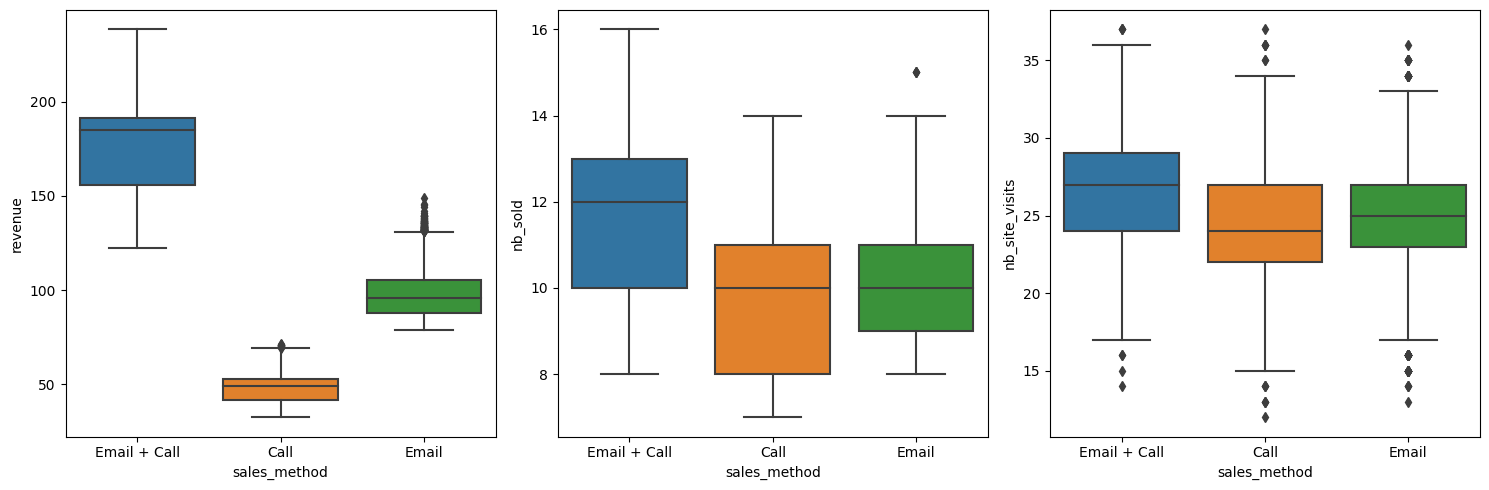

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.countplot(x="sales_method", data=product_sales)
#sns.boxplot(x="sales_method", y="revenue", data=product_sales)
#sns.distplot(product_sales["years_as_customer"])


fig, axes = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x="sales_method", y="revenue", data=product_sales, ax=axes[0])
sns.boxplot(x="sales_method", y="nb_sold", data=product_sales, ax=axes[1])
sns.boxplot(x="sales_method", y="nb_site_visits", data=product_sales, ax=axes[2])

plt.tight_layout()
plt.show()

# 📝 DEFINITION OF A METRIC FOR THE BUSINESS TO MONITOR

## Define a metric for the business to monitor

**Average revenue per customer (ARPC)** is a metric that calculates the average amount of revenue generated by each customer. This metric gives a general idea of the amount of revenue being generated per customer, it can be applied to all the revenue data and all costumers or it can be applied for each particular sales method that was used.

To calculate the **general ARPC** metric, we first sum up the total revenue generated by all sales methods. Then, we count the total number of unique customers who made purchases across all sales methods. Finally, we divide the total revenue by the total number of unique customers to get the average revenue per customer across all sales methods. To calculate the **particular ARPC** for each sales method, all we have to do different is to filter the data for each sales method.

## How should the business use the metric to monitor the business problem

This metric can be useful for understanding the overall revenue-generating performance of the business and can help identify opportunities to increase revenue per customer. If the ARPC is low for a **particular sales method** with respect to the **general ARPC** and another method has a better ARPC, the business may want to focus on the **sales method that have better ARPC**.

## Can you estimate initial value(s) for the metric based on the current data

The initial value for the metric **general ARPC** is 93.93, and the values of the **ARPC for each particular sales method** is indicated in the next table. These initial values are calculated with all the data points available at the moment, so this metric will have to be adjusted with time. 

From this metric it can be conclude that **the best performing sales method is "Email+Call"** as it has an **ARPC of 183.65** compare to the **general ARPC of 93.93**.


| sales_method | ARPC |
|--------------|---------------------|
| GENERAL (NO PARTICULAR SALES METHOD)         | 93.93           |
| Call         | 47.59           |
| Email        | 97.12         |
| Email + Call | 183.65          |


# 📝 Final summary including recommendations that the business should undertake

1.	We receive sales data for a new product line for the first 6 weeks of sales from 15000 customers, of which we perform some minor data cleaning on "sales_method" and "years_as_custumer". The **revenue data** has 1074 missing values, which were **drop and not replace** for some filling metric like the mean value, because we determine that is not a appropriate for the purpose of this particular data analysis to do such replacement.

3.	We perform an exploratory data analysis on this data, from this exploratory data analysis it can be conclude that the sales team should focus further efforts of selling on the **“Email+Call” sales method**, for the next reasons:

- It has **more revenue** (statistically significant analyzed with hypothesis test).
- It has **more new products sold**.
- It has **more web page visits**.
- The revenue for this method **increases relatively more** over time compared to the other two methods.
- This method only requires **10 minutes per call for the sales team**, in contrast the 30 minutes per call that are required for the "Call" method.

4. We propose a metric called **Average Revenue Per Customer (ARPC)** in order to evaluate each sales method, currently the **best performing method with this metric is “Email+Call”**. This metric ARPC has a general value of **93.93** at present time.


In [9]:
# calculate total revenue per sales method and customer
total_revenue = product_sales.groupby(['sales_method', 'customer_id'])['revenue'].sum()

# calculate number of customers per sales method
num_customers = product_sales.groupby('sales_method')['customer_id'].nunique()

# calculate revenue per customer per sales method
revenue_per_customer = total_revenue / num_customers

# print revenue per customer per sales method
print(revenue_per_customer)




# calculate total revenue per sales method
total_revenue = product_sales.groupby('sales_method')['revenue'].sum()

# calculate number of customers per sales method
num_customers = product_sales.groupby('sales_method')['customer_id'].nunique()

# calculate average revenue per customer per sales method
avg_revenue_per_customer = total_revenue / num_customers

# print average revenue per customer per sales method
print(avg_revenue_per_customer)





# calculate total revenue
total_revenue = product_sales['revenue'].sum()

# calculate number of customers
num_customers = product_sales['customer_id'].nunique()

# calculate average revenue per customer
avg_revenue_per_customer = total_revenue / num_customers

# print average revenue per customer
print(avg_revenue_per_customer)

sales_method  customer_id                         
Call          00058065-ed47-4bc0-b74e-6803d0b67644    0.008770
              00169f03-bc6a-4944-b381-97a0eb1090b7    0.010667
              00254aaf-1c92-4a98-9ff3-96068fa38fea    0.008881
              0029cf18-2280-4cfd-bec7-9dced67adc36    0.010661
              002bac19-ad17-474a-8dad-e54249e3a63a    0.010893
                                                        ...   
Email + Call  ff9f63bb-c98e-4175-a4e5-25a4a4f0bf47    0.066383
              ffd343bc-e71d-4d79-9c9f-aac0b9351e84    0.069352
              fff2ac99-1300-4a02-8aa0-ce6440f7ce6f    0.083950
              fff8d038-8306-46a6-8c12-e1416e0dd978    0.066725
              fffddf1c-3f29-48a4-99fc-d202869dbd05    0.070472
Length: 13926, dtype: float64
sales_method
Call             47.597467
Email            97.127684
Email + Call    183.651233
dtype: float64
93.93494255349705


sales_method
Call            4781
Email           6922
Email + Call    2223
Name: customer_id, dtype: int64


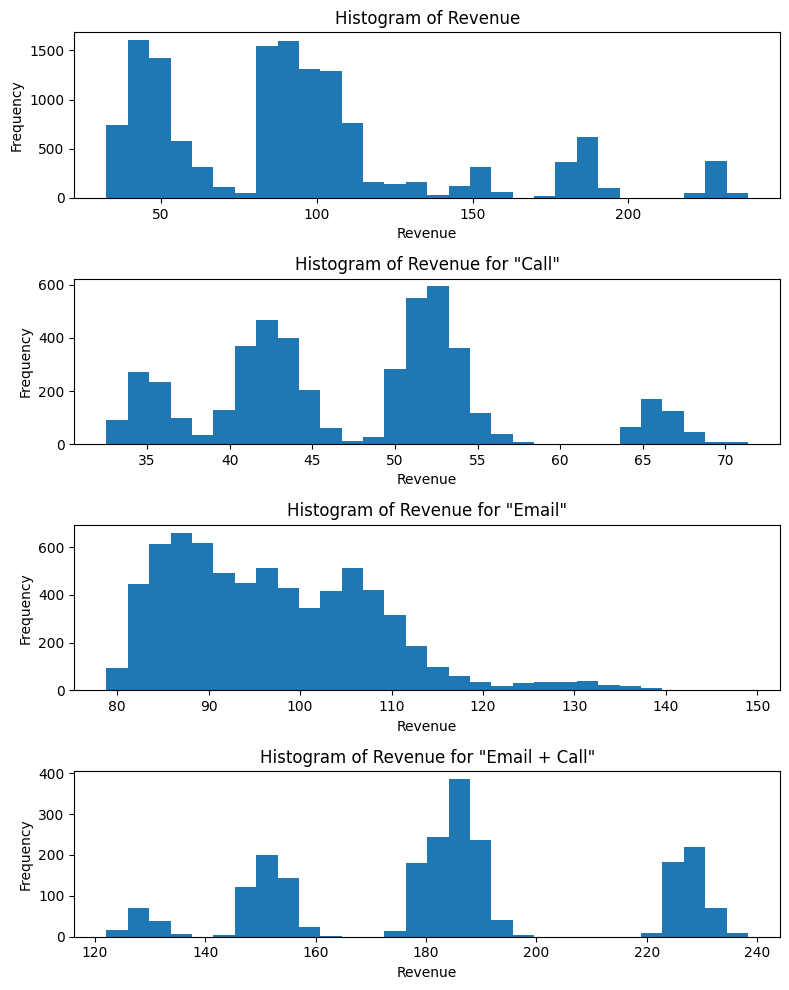

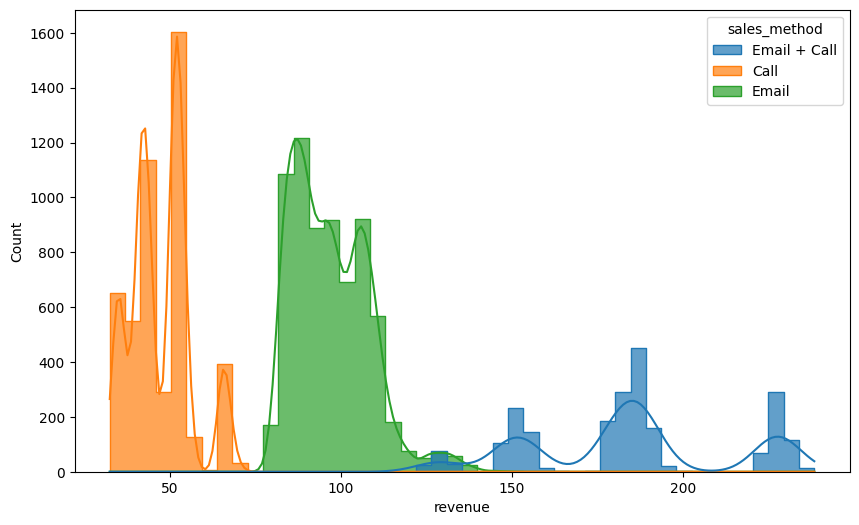

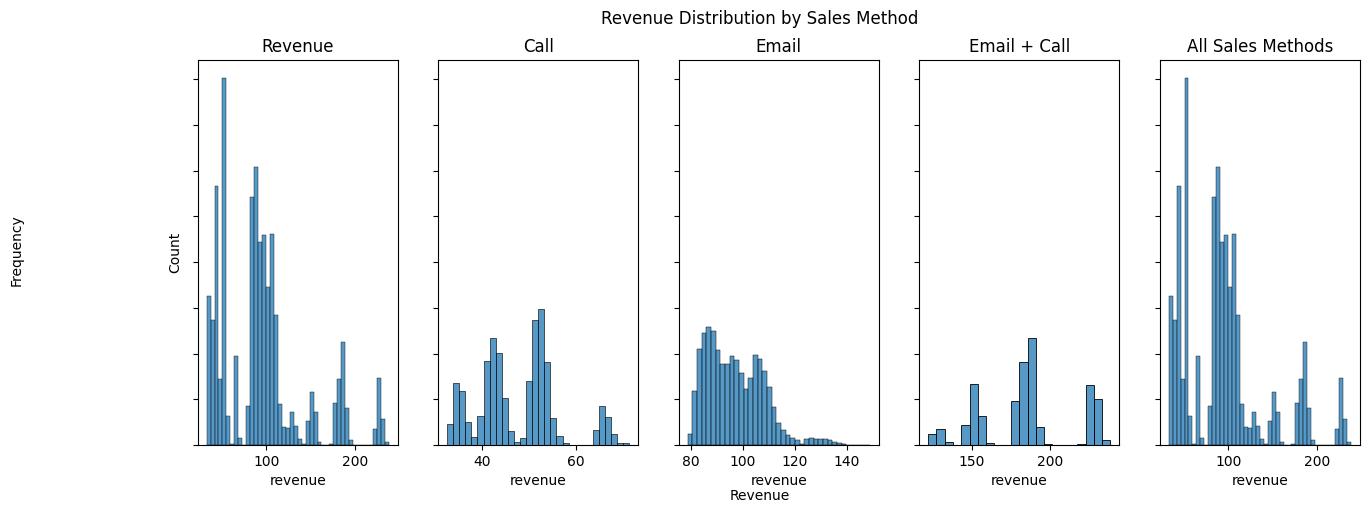

<AxesSubplot: xlabel='revenue', ylabel='Count'>

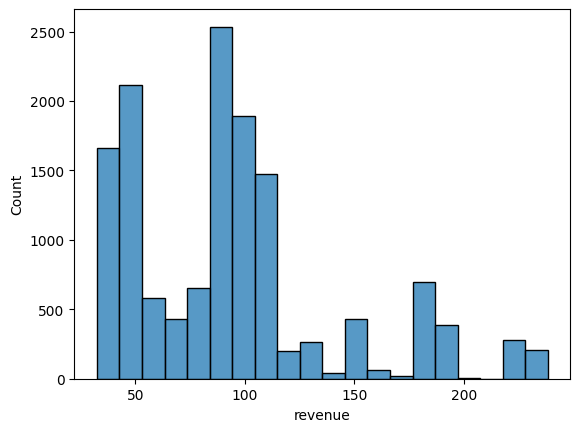

In [10]:
num_customers = product_sales.groupby('sales_method')['customer_id'].nunique()
print(num_customers)

import matplotlib.pyplot as plt

# Create a figure and axis with 4 subplots
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(8, 10))

# Create histograms for revenue, revenue for "Call", "Email", and "Email + Call"
axs[0].hist(product_sales['revenue'], bins=30)
axs[0].set_xlabel('Revenue')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of Revenue')

axs[1].hist(product_sales[product_sales['sales_method'] == 'Call']['revenue'], bins=30)
axs[1].set_xlabel('Revenue')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Revenue for "Call"')

axs[2].hist(product_sales[product_sales['sales_method'] == 'Email']['revenue'], bins=30)
axs[2].set_xlabel('Revenue')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Histogram of Revenue for "Email"')

axs[3].hist(product_sales[product_sales['sales_method'] == 'Email + Call']['revenue'], bins=30)
axs[3].set_xlabel('Revenue')
axs[3].set_ylabel('Frequency')
axs[3].set_title('Histogram of Revenue for "Email + Call"')

# Adjust layout and spacing
fig.tight_layout()
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(data=product_sales, x='revenue', hue='sales_method', element='step', kde=True, alpha=0.7, ax=ax)

plt.show()

# create subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)

# plot histograms
sns.histplot(data=product_sales, x="revenue", ax=axes[0])
sns.histplot(data=product_sales[product_sales["sales_method"] == "Call"], x="revenue", ax=axes[1])
sns.histplot(data=product_sales[product_sales["sales_method"] == "Email"], x="revenue", ax=axes[2])
sns.histplot(data=product_sales[product_sales["sales_method"] == "Email + Call"], x="revenue", ax=axes[3])
sns.histplot(data=product_sales, x="revenue", ax=axes[4])

# set subplot titles
axes[0].set(title="Revenue")
axes[1].set(title="Call")
axes[2].set(title="Email")
axes[3].set(title="Email + Call")
axes[4].set(title="All Sales Methods")

# remove y-axis labels for subplots except the first one
axes[1].set(yticklabels=[])
axes[2].set(yticklabels=[])
axes[3].set(yticklabels=[])
axes[4].set(yticklabels=[])

# set overall plot title and axis labels
plt.suptitle("Revenue Distribution by Sales Method")
fig.text(0.5, 0, "Revenue", ha="center")
fig.text(0, 0.5, "Frequency", va="center", rotation="vertical")

plt.show()

sns.histplot(data=product_sales, x='revenue', bins=20)

In [11]:
range = product_sales['revenue'].max() - product_sales['revenue'].min()
print('Range:', range)

import numpy as np

q1 = np.percentile(product_sales['revenue'], 25)
q3 = np.percentile(product_sales['revenue'], 75)
iqr = q3 - q1
print('IQR:', iqr)

std_dev = product_sales['revenue'].std()
print('Standard deviation:', std_dev)

variance = product_sales['revenue'].var()
print('Variance:', variance)

print(product_sales['revenue'].describe())

Range: 205.78
IQR: 54.8575
Standard deviation: 47.43531224572558
Variance: 2250.1088478494826
count    13926.000000
mean        93.934943
std         47.435312
min         32.540000
25%         52.470000
50%         89.500000
75%        107.327500
max        238.320000
Name: revenue, dtype: float64


In [12]:

# group by sales method and calculate the desired statistics
sales_method_revenue_stats = product_sales.groupby('sales_method')['revenue'].agg(['std', 'var'])

sales_method_revenue_stats['range'] = product_sales.groupby('sales_method')['revenue'].apply(lambda x: x.max() - x.min())

# display the results
print(sales_method_revenue_stats)

sales_method_revenue_stats = product_sales.groupby('sales_method')['revenue'].describe()

print(sales_method_revenue_stats)

                    std         var   range
sales_method                               
Call           8.609899   74.130361   38.82
Email         11.210469  125.674615   70.14
Email + Call  29.083924  845.874652  116.21
               count        mean        std  ...     50%     75%     max
sales_method                                 ...                        
Call          4781.0   47.597467   8.609899  ...   49.07   52.68   71.36
Email         6922.0   97.127684  11.210469  ...   95.58  105.17  148.97
Email + Call  2223.0  183.651233  29.083924  ...  184.74  191.11  238.32

[3 rows x 8 columns]


<AxesSubplot: xlabel='week', ylabel='revenue'>

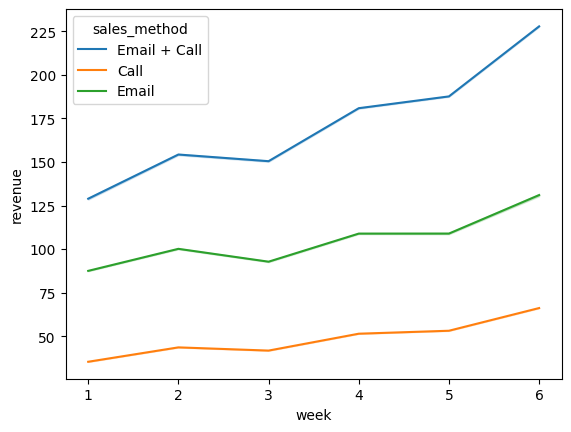

In [13]:
sns.lineplot(data=product_sales, x='week', y='revenue', hue='sales_method')

In [14]:
mean_revenue = product_sales.groupby('sales_method')['revenue'].mean()
print(mean_revenue)

mean_nb_sold = product_sales.groupby('sales_method')['nb_sold'].mean()
print(mean_nb_sold)

mean_nb_site_visits = product_sales.groupby('sales_method')['nb_site_visits'].mean()
print(mean_nb_site_visits)

sales_method
Call             47.597467
Email            97.127684
Email + Call    183.651233
Name: revenue, dtype: float64
sales_method
Call             9.500941
Email            9.723057
Email + Call    12.186685
Name: nb_sold, dtype: float64
sales_method
Call            24.422297
Email           24.734036
Email + Call    26.738641
Name: nb_site_visits, dtype: float64


In [15]:
# Subset the data for the last 4 weeks
last_month_data = product_sales.loc[product_sales['week'].isin([3, 4, 5, 6])]

# Calculate the total revenue for each sales method
revenue_by_sales_method = last_month_data.groupby('sales_method')['revenue'].sum()

# Calculate the monthly revenue by multiplying the total revenue by 4
monthly_revenue = revenue_by_sales_method

# Print the monthly revenue for each sales method
print(monthly_revenue)


total_revenue = product_sales.groupby('sales_method')['revenue'].sum()
print(total_revenue)

sales_method
Call            167612.29
Email           304660.71
Email + Call    364995.13
Name: revenue, dtype: float64
sales_method
Call            227563.49
Email           672317.83
Email + Call    408256.69
Name: revenue, dtype: float64


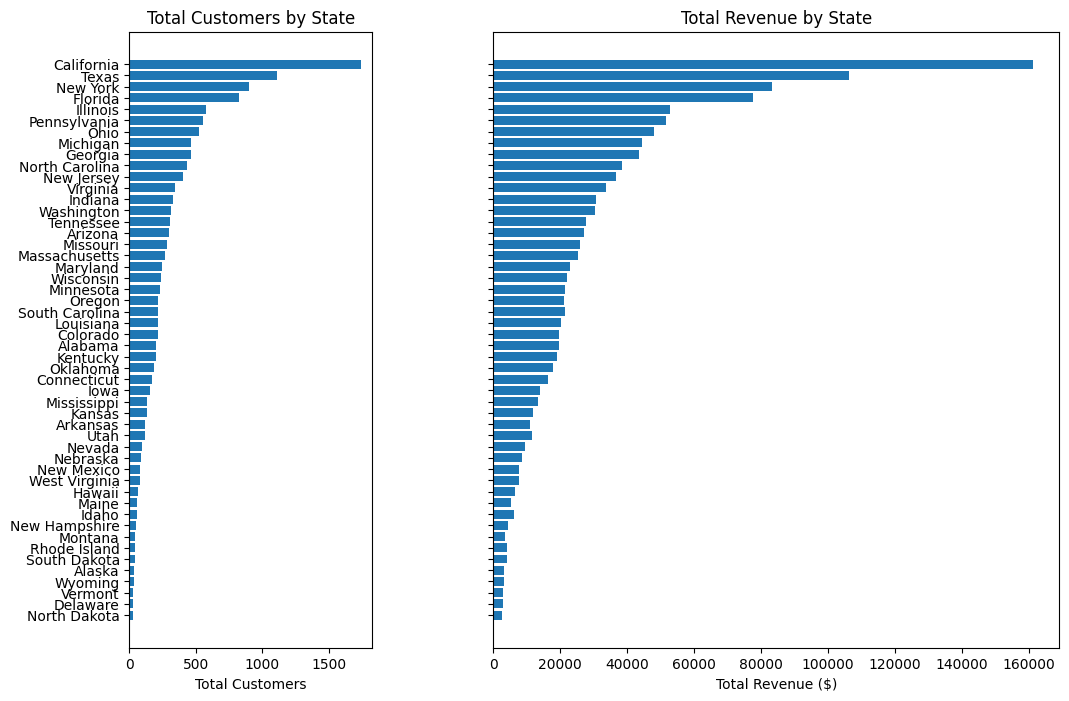

In [16]:
# Create bar chart for total customers in each state
state_counts = product_sales['state'].value_counts()
state_counts = state_counts.sort_values(ascending=True)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [3, 7]})
ax1.barh(state_counts.index, state_counts.values)
ax1.set_xlabel('Total Customers')
ax1.set_title('Total Customers by State')

# Create bar chart for total revenue in each state
state_revenue = product_sales.groupby('state')['revenue'].sum().sort_values(ascending=True)
ax2.barh(state_revenue.index, state_revenue.values)
ax2.set_xlabel('Total Revenue ($)')
ax2.set_title('Total Revenue by State')

plt.subplots_adjust(wspace=0.3)
plt.show()

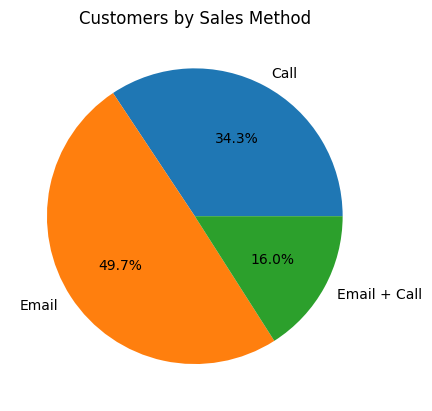

In [17]:
import matplotlib.pyplot as plt

# Get the count of customers for each sales method
sales_method_counts = product_sales.groupby('sales_method').count()['customer_id']

# Create a pie chart with percentages
plt.pie(sales_method_counts, labels=sales_method_counts.index, autopct='%1.1f%%')
plt.title('Customers by Sales Method')
plt.show()

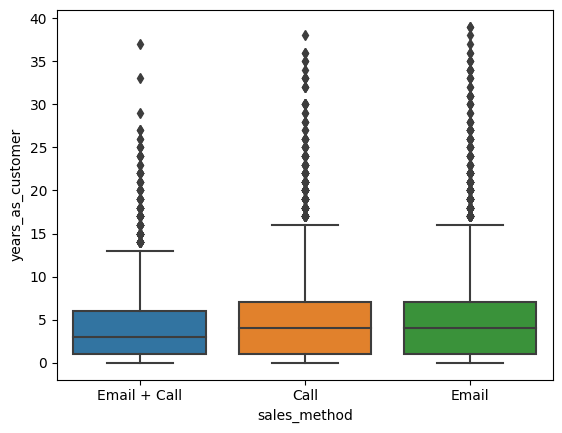

In [18]:
sns.boxplot(x="sales_method", y="years_as_customer", data=product_sales)
plt.show()

In [37]:
import statsmodels.stats.power as smp

# Set the parameters for the power analysis
effect_size = 0.2 # small effect size
alpha = 0.05 # significance level
power = 0.8 # power level

# Calculate the minimum sample size required
nobs = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power)

print("Minimum sample size required:", nobs)

#5. This sales method of "Email+Call" accounts for **16%** of the total customers outreached, so it will be a good idea to have a follow up of this analysis when more customers have been contacted by this method.

Minimum sample size required: 393.4056989990335


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation